# 实例：实现多分类问题

### 独热编码one_hot ( indices, depth )

In [1]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.5.0-rc3


In [2]:
import numpy as np

In [3]:
gpus=tf.config.experimental.list_physical_devices(device_type='GPU')
cpus=tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus)
print(cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
a=[0,2,3,5]
b=tf.one_hot(a,6)
b

In [ ]:
pred=np.array([[0.1,0.2,0.7],
               [0.1,0.7,0.2],
               [0.3,0.4,0.3]])#预测值
y=np.array([2,1,0])#标记
y_onehot=np.array([[0,0,1],
                   [0,1,0],
                   [1,0,0]])#标记独热编码

Error: Session cannot generate requests

In [ ]:
tf.argmax(pred,axis=1)#预测值中的行最大数索引

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([2, 1, 1], dtype=int64)>

In [ ]:
tf.equal(tf.argmax(pred,axis=1),y)#判读预测值是否与样本标记相同

<tf.Tensor: shape=(3,), dtype=bool, numpy=array([ True,  True, False])>

In [ ]:
tf.cast(tf.equal(tf.argmax(pred,axis=1),y),tf.float32)#将布尔值转为数字

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 0.], dtype=float32)>

In [ ]:
tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pred,axis=1),y),tf.float32))
#求平均，即求准确率

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

### 交叉熵损失函数

In [ ]:
-y_onehot*tf.math.log(pred)

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[-0.        , -0.        ,  0.35667494],
       [-0.        ,  0.35667494, -0.        ],
       [ 1.2039728 , -0.        , -0.        ]])>

In [ ]:
-tf.reduce_sum(y_onehot*tf.math.log(pred))#所有样本交叉熵之和

<tf.Tensor: shape=(), dtype=float64, numpy=1.917322692203401>

In [ ]:
-tf.reduce_sum(y_onehot*tf.math.log(pred))/len(pred)#平均交叉熵损失

<tf.Tensor: shape=(), dtype=float64, numpy=0.6391075640678003>

# 例子：使用花瓣长度、花瓣宽度将三种鸢尾花区分开

### 加载数据

In [ ]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.5.0-rc3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)

In [ ]:
df_iris_train=pd.read_csv(train_path,header=0)

### 处理数据

In [ ]:
iris_train=np.array(df_iris_train)

In [ ]:
iris_train.shape

(120, 5)

In [ ]:
x_train=iris_train[:,2:4]
y_train=iris_train[:,4]

In [ ]:
x_train.shape,y_train.shape

((120, 2), (120,))

In [ ]:
num_train=len(x_train)

### 处理数据——生成多元模型的属性矩阵和标签列向量

In [ ]:
x0_train=np.ones(num_train).reshape(-1,1)

In [ ]:
X_train=tf.cast(tf.concat([x0_train,x_train],axis=1),tf.float32)
Y_train=tf.one_hot(tf.constant(y_train,dtype=tf.int32),3)

In [ ]:
X_train.shape,Y_train.shape

(TensorShape([120, 3]), TensorShape([120, 3]))

### 设置超参数

In [ ]:
learn_rate=0.2
iter=500

display_step=100

### 设置模型参数初始值

In [ ]:
np.random.seed(612)
W=tf.Variable(np.random.randn(3,3),dtype=tf.float32)

### 训练模型

In [ ]:
cce=[]
acc=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        
        PRED_train=tf.nn.softmax(tf.matmul(X_train,W))
        Loss_train=-tf.reduce_sum(Y_train*tf.math.log(PRED_train))/num_train
        
    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_train.numpy(),axis=1),y_train),tf.float32))
   
    acc.append(accuracy)
    cce.append(Loss_train)

    dL_dW=tape.gradient(Loss_train,W)
    W.assign_sub(learn_rate*dL_dW)
    
    if i % display_step==0:
        print("i:%i,Acc:%f,Loss:%f"%(i,accuracy,Loss_train))

i:0,Acc:0.350000,Loss:4.510763
i:100,Acc:0.808333,Loss:0.503537
i:200,Acc:0.883333,Loss:0.402912
i:300,Acc:0.891667,Loss:0.352650
i:400,Acc:0.941667,Loss:0.319779
i:500,Acc:0.941667,Loss:0.295599


### 训练结果

In [ ]:
PRED_train.shape#3:属于每种类别的概率

TensorShape([120, 3])

In [ ]:
tf.reduce_sum(PRED_train,axis=1)#概率和为1

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([1.        , 1.        , 1.        , 0.9999999 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 0.9999999 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 1.0000001 ,
       0.99999994, 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 0.99999994,
       1.     

In [ ]:
tf.argmax(PRED_train.numpy(),axis=1)#转为自然顺序码

<tf.Tensor: shape=(120,), dtype=int64, numpy=
array([2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 0, 2, 0, 1, 1, 0, 0, 1], dtype=int64)>

### 绘制分类图

In [ ]:
M=500
x1_min,x2_min=x_train.min(axis=0)
x1_max,x2_max=x_train.max(axis=0)
t1=np.linspace(x1_min,x1_max,M)
t2=np.linspace(x2_min,x2_max,M)
m1,m2=np.meshgrid(t1,t2)

In [ ]:
m0=np.ones(M*M)
X_=tf.cast(np.stack((m0,m1.reshape(-1),m2.reshape(-1)),axis=1),tf.float32)
Y_=tf.nn.softmax(tf.matmul(X_,W))

In [ ]:
Y_=tf.argmax(Y_.numpy(),axis=1)

In [ ]:
n=tf.reshape(Y_,m1.shape)

In [ ]:
n

<tf.Tensor: shape=(500, 500), dtype=int64, numpy=
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)>

<ipython-input-54-b7541540389c>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(m1,m2,n,cmap=cm_bg)


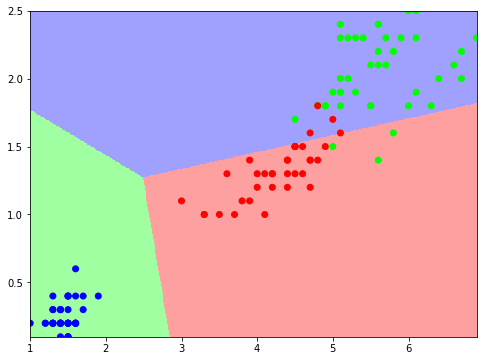

In [ ]:
plt.figure(figsize=(8,6))

cm_bg=mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])

plt.pcolormesh(m1,m2,n,cmap=cm_bg)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap="brg")

plt.show()